In [1]:
from utils.results import *
import torch
import matplotlib.pyplot as plt
import json

In [2]:
# settings for the plots,
dataset= 'beantec'
run= "contamination_0"  
experiment=  "Exp_18_06_24-"#,"Exp0-r18",
#category= "juice_bottle"

RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  


with open('/home/bule/projects/UTRAD/configurations/beantec.json', 'r') as file:
    conf_beantec = json.load(file)
print(list(conf_beantec['anomaly_categories'].keys()))

['01', '02', '03']


['01', '02', '03']
['01', '02', '03']
01
02
03
       Loss  Loss_scale  image_AUC  pixel_AUC category contamination setting
0  0.004843    0.011448   0.962099   0.935301       01             0   clean
1  0.004885    0.011509   0.973761   0.937967       01             0   clean
2  0.004865    0.011685   0.987366   0.940521       01             0   clean
3  0.004858    0.011396   0.975705   0.938538       01             0   clean
4  0.004860    0.011460   0.965015   0.931501       01             0   clean
0  0.003157    0.006219   0.731167   0.955043       02             0   clean
1  0.003143    0.006087   0.749333   0.953351       02             0   clean
2  0.003150    0.006058   0.773333   0.959348       02             0   clean
3  0.003150    0.006065   0.737833   0.956945       02             0   clean
4  0.003161    0.006129   0.744167   0.959002       02             0   clean
0  0.001793    0.003571   0.994512   0.993871       03             0   clean
1  0.001774    0.003499   0.9

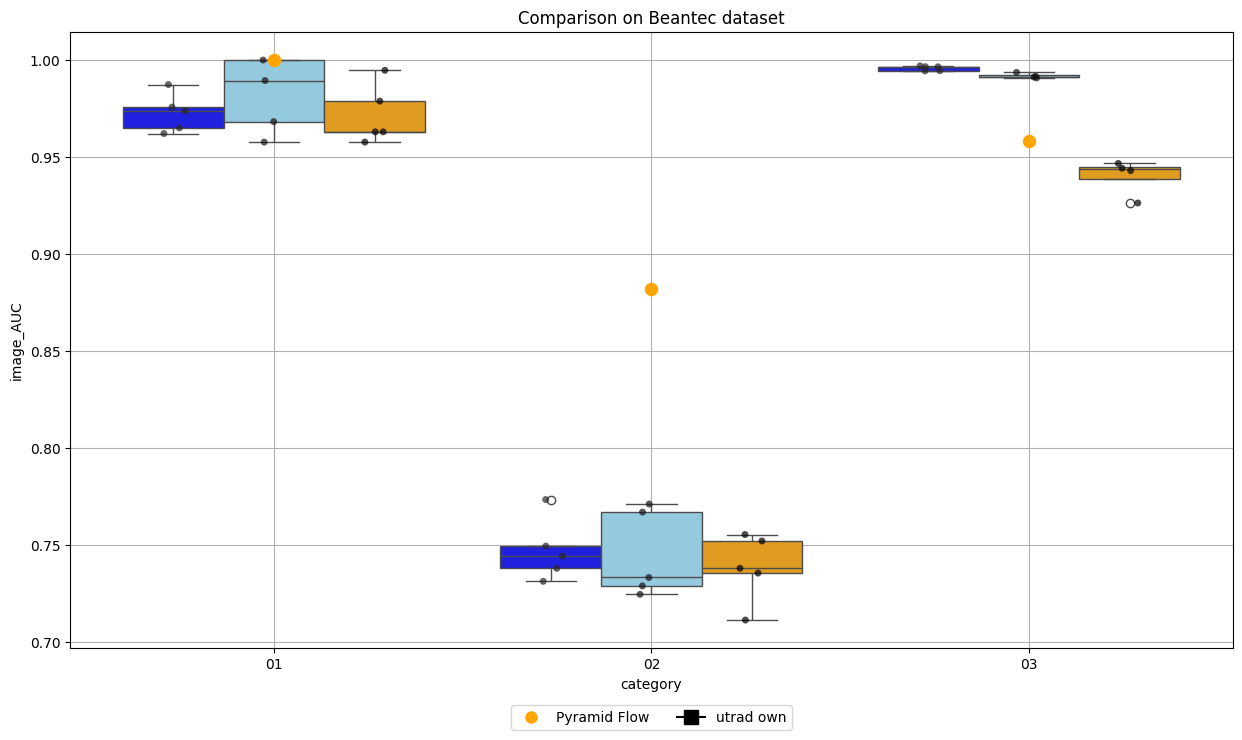

In [3]:
exp_name= "Exp_18_06_24"
category= "01"
root= '/home/bule/projects/UTRAD/results/beantec/contamination_0/'

with open('/home/bule/projects/UTRAD/configurations/beantec.json', 'r') as file:
    conf_beantec = json.load(file)
print(list(conf_beantec['anomaly_categories'].keys()))

run=1
logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

category_list= list(conf_beantec['anomaly_categories'].keys())

print(category_list)
#category_list= ['01', '02']
run_range= np.arange(1,6)

res_df=[]
for category in category_list:
    print(category)
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

        if os.path.exists(logfile_path):
            if len(read_training_scores( logfile_path)['Loss'])<150:
                continue
            else:
                logfile_paths.append(logfile_path)
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df.append(lastrow_df)
    
res_df= pd.concat(res_df)
res_df['contamination']= ['0']*len(res_df)
res_df['setting']= ['clean']*len(res_df)

print(res_df)

exp_name= "Exp_18_06_24"
root= '/home/bule/projects/UTRAD/results/beantec/contamination_10/'

run_range= np.arange(1,6)
res_df_cont=[]
for category in category_list:
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            if len(read_training_scores(logfile_path)['Loss'] )>=150:
                logfile_paths.append(logfile_path)
            
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df_cont.append(lastrow_df)
    
res_df_cont= pd.concat(res_df_cont)
res_df_cont['contamination']= ['10']*len(res_df_cont)
res_df_cont['setting']= ['contaminated']*len(res_df_cont)

print(res_df_cont)


exp_name= "Exp_18_06_24"
root= '/home/bule/projects/UTRAD/results/beantec/contamination_10/'

run_range= np.arange(1,6)
res_df_cont_c=[]
for category in category_list:
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args_cleaned.log')
        if os.path.exists(logfile_path):
            if len(read_training_scores(logfile_path)['Loss'] )>=150:
                logfile_paths.append(logfile_path)
            
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df_cont_c.append(lastrow_df)
    
res_df_cont_c= pd.concat(res_df_cont_c)
res_df_cont_c['contamination']= ['10']*len(res_df_cont_c)
res_df_cont_c['setting']= ['clean_reduced']*len(res_df_cont_c)





res_df_end=pd.concat([res_df, res_df_cont,res_df_cont_c])



hue_order = ['clean', 'clean_reduced', 'contaminated']
palette = {
    'clean': 'blue',
    'clean_reduced': 'skyblue',
    'contaminated': 'orange'
}



auc_Pyramid = {'01': [1],'02': [0.882],'03': [0.958]}

# PyramidFlow: High-Resolution Defect Contrastive Localization
# using Pyramid Normalizing Flow

plt.figure(figsize=(15, 8))

ax = sns.boxplot(x="category", y="image_AUC", hue="setting", data=res_df_end,hue_order=hue_order,palette=palette)
sns.stripplot(data=res_df_end, x="category", y="image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)

for category, auc in auc_Pyramid.items():
    ax.scatter(x=[category], y=auc, color='orange', s=75, zorder=5)


# Add custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Pyramid Flow', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='s', color='black', label='utrad own', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.081), ncol=3)
plt.title('Comparison on Beantec dataset')
plt.grid(True)
plt.show()

In [4]:
def read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec/',log='args.log',exp_name= "Exp_07_06",contamination='10',setting='contaminated',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec.json'):

    if log=='args_cleaned.log' and contamination=='10' and setting=='contaminated':
        raise ValueError('This function is not intended for cleaned logs with contamination 10 , setting should be clean_reduced')

    root=os.path.join(root, f'contamination_{contamination}')
    with open(CONFIG_PATH, 'r') as file:
        conf = json.load(file)

    category_list= list(conf['anomaly_categories'].keys())
    res_df=[]
    for category in category_list:
        logfile_paths= []
        runs=[]
        logfile_path_names=[]
        for run in run_range:
            
            logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{str(category)}', log)
            if os.path.exists(logfile_path):
                if len(read_training_scores(logfile_path)['Loss'] )==150:
                    logfile_paths.append(logfile_path)  
                    logfile_path_names.extend([logfile_path]*150)
                    runs.extend([run]*150) 
        print(logfile_paths)
        if len(logfile_paths)==0:
            continue
        else:
            allrows_df=all_results_conc(logfile_paths)
            allrows_df['path']=logfile_path_names        
            allrows_df['run']=runs
            allrows_df['category']= [category]*len(allrows_df)
            allrows_df['postprocessing']= [postprocessing]*len(allrows_df)
            allrows_df['contamination']= [contamination]*len(allrows_df)
            allrows_df['setting']= [setting]*len(allrows_df)
            res_df.append(allrows_df)
            
    return  pd.concat(res_df)

allrows_df_end_cont=         read_all_log_info(root= '/home/bule/projects/UTRAD/results/beantec/',log='args.log',exp_name= "Exp_18_06_24",contamination='10',setting='contaminated',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/beantec.json')
allrows_df_end_clean_reduced=read_all_log_info(root= '/home/bule/projects/UTRAD/results/beantec/',log='args_cleaned.log',exp_name= "Exp_18_06_24",contamination='10',setting='clean_reduced',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/beantec.json')
allrows_df_end_clean=        read_all_log_info(root= '/home/bule/projects/UTRAD/results/beantec/',log='args.log',exp_name= "Exp_18_06_24",contamination='0',setting='clean',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/beantec.json')

allres=pd.concat([allrows_df_end_cont,allrows_df_end_clean_reduced,allrows_df_end_clean])
allres

['/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_1-01/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_2-01/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_3-01/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_4-01/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_5-01/args.log']
['/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_1-02/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_2-02/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_3-02/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_4-02/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_5-02/args.log']
['/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_

,Loss,Loss_scale,image_AUC,pixel_AUC,epoch,path,run,category,postprocessing,contamination,setting
0,0.081737,32.907894,0.645503,0.687865,0,/home/bule/projects/UTRAD/results/beantec/cont...,1,01,original,10,contaminated
1,0.059085,18.354265,0.624339,0.561493,1,/home/bule/projects/UTRAD/results/beantec/cont...,1,01,original,10,contaminated
2,0.048128,10.729018,0.481481,0.473801,2,/home/bule/projects/UTRAD/results/beantec/cont...,1,01,original,10,contaminated
3,0.040083,5.504925,0.497354,0.467771,3,/home/bule/projects/UTRAD/results/beantec/cont...,1,01,original,10,contaminated
4,0.034959,2.531582,0.555556,0.750512,4,/home/bule/projects/UTRAD/results/beantec/cont...,1,01,original,10,contaminated
...,...,...,...,...,...,...,...,...,...,...,...
745,0.001797,0.003565,0.995610,0.993849,145,/home/bule/projects/UTRAD/results/beantec/cont...,5,03,original,0,clean
746,0.001791,0.003561,0.996220,0.994111,146,/home/bule/projects/UTRAD/results/beantec/cont...,5,03,original,0,clean
747,0.001785,0.003540,0.996890,0.994059,147,/home/bule/projects/UTRAD/results/beantec/cont...,5,03,original,0,clean
748,0.001781,0.003541,0.994451,0.993843,148,/home/bule/projects/UTRAD/results/beantec/cont...,5,03,original,0,clean


In [5]:
lasteps=allres[allres['epoch']==149]
conts=lasteps[lasteps['setting']=='contaminated']
cleans=lasteps[lasteps['setting']=='clean_reduced']
joined_df = pd.merge(conts, cleans, on=['run', 'category'], suffixes=('_contaminated', '_clean'))
diff=joined_df['image_AUC_clean']-joined_df['image_AUC_contaminated']
print('image_auc',diff.mean())

lasteps=allres[allres['epoch']==149]
conts=lasteps[lasteps['setting']=='contaminated']
cleans=lasteps[lasteps['setting']=='clean_reduced']
joined_df = pd.merge(conts, cleans, on=['run', 'category'], suffixes=('_contaminated', '_clean'))
diff=joined_df['pixel_AUC_clean']-joined_df['pixel_AUC_contaminated']
print('pixel_auc',diff.mean())

image_auc 0.02127335714285714
pixel_auc 0.02010092857142857


01
02
03
  category  t_stat_image  p_value_image  t_stat_pixel  p_value_pixel  \
0       01     -2.060489       0.054196     -8.294590       0.000017   
1       02     -1.058444       0.174768     -2.636539       0.014937   
2       03     -9.906636       0.001094     -4.371411       0.002356   

   image_difference  pixel_difference  image_median_clean  \
0          0.011640          0.026390            0.989418   
1          0.006501          0.025492            0.733126   
2          0.051780          0.005500            0.991439   

   image_median_contaminated  pixel_median_clean  pixel_median_contaminated  
0                   0.962963            0.972502                   0.945294  
1                   0.737888            0.957003                   0.940269  
2                   0.943585            0.995844                   0.990452  


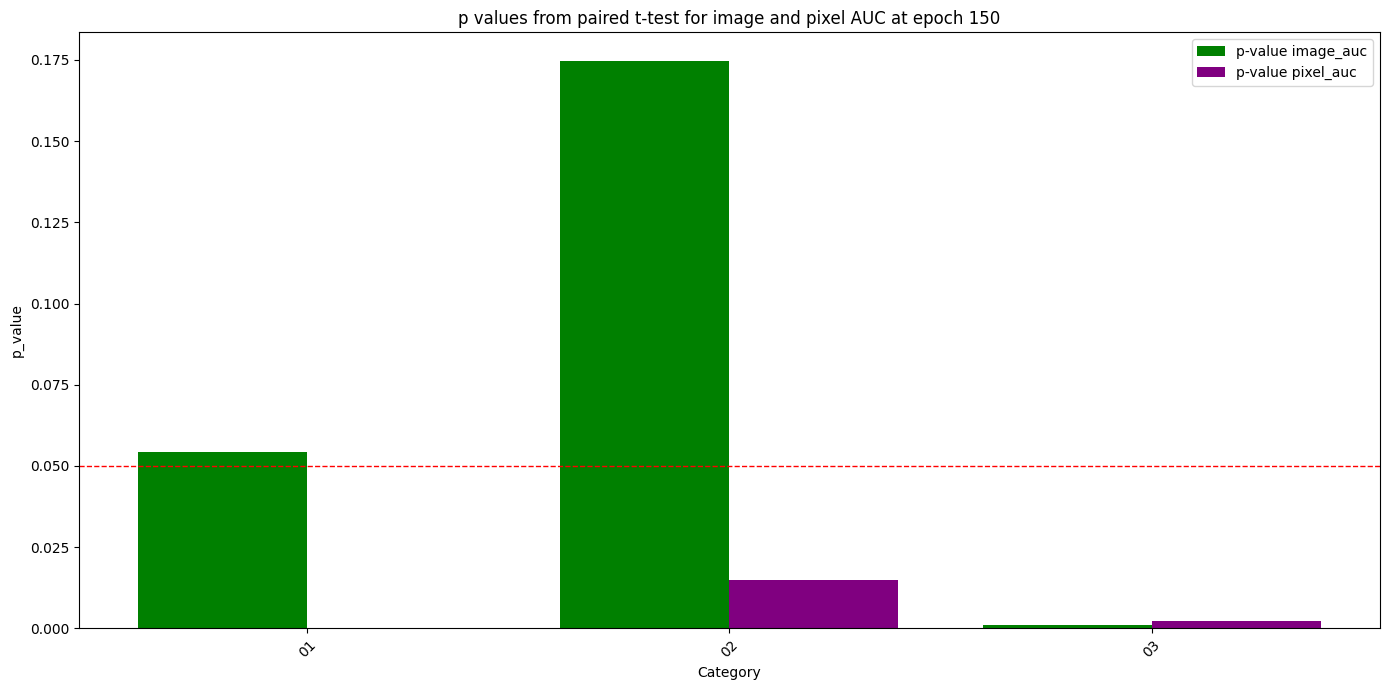

In [18]:
from scipy.stats import ttest_rel ,ttest_ind
lasteps=allres[allres['epoch']==149]
conts=lasteps[lasteps['setting']=='contaminated']
cleans=lasteps[lasteps['setting']=='clean_reduced']

# Joining the conts and cleans DataFrames on 'run' and 'category'
joined_df = pd.merge(conts, cleans, on=['run', 'category'], suffixes=('_contaminated', '_clean'))

# Displaying the result
joined_df.head()



def paired_t_test_per_category(df, category_column):
    categories = df[category_column].unique()
    t_test_results = []

    for category in categories:
        print(category)
        category_data = df[df[category_column] == category]
        contaminated_values = category_data['image_AUC_contaminated']
        clean_values = category_data['image_AUC_clean']
    
        image_difference= np.mean(clean_values-contaminated_values)
        image_median_clean= np.median(clean_values)
        image_median_contaminated= np.median(contaminated_values)
    
        t_stat, p_value = ttest_rel(contaminated_values,clean_values,alternative='less')
        
        contaminated_values = category_data['pixel_AUC_contaminated']
        clean_values = category_data['pixel_AUC_clean']
        t_stat_pixel, p_value_pixel = ttest_ind(contaminated_values, clean_values, alternative='less')
        pixel_median_clean= np.median(clean_values)
        pixel_median_contaminated= np.median(contaminated_values)
        
        
        
        t_test_results.append({'category': category, 't_stat_image': t_stat, 'p_value_image': p_value, 't_stat_pixel': t_stat_pixel, 'p_value_pixel': p_value_pixel,'image_difference':image_difference, 'pixel_difference':np.mean(clean_values-contaminated_values), 'image_median_clean':image_median_clean, 'image_median_contaminated':image_median_contaminated, 'pixel_median_clean':pixel_median_clean, 'pixel_median_contaminated':pixel_median_contaminated})

    return pd.DataFrame(t_test_results)

df = paired_t_test_per_category(joined_df, 'category')
df.to_csv('/home/bule/projects/UTRAD/results/beantec/allresults/paired_t_test_data.csv', index=False)
print(df)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Width for bars
bar_width = 0.4
index = range(len(df['category']))

# p_value_image plot
ax.bar([i - bar_width/2 for i in index], df['p_value_image'], bar_width, color='green', label='p-value image_auc')

# p_value_pixel plot
ax.bar([i + bar_width/2 for i in index], df['p_value_pixel'], bar_width, color='purple', label='p-value pixel_auc')

# Adding the red dashed line at y=0.05
ax.axhline(y=0.05, color='r', linestyle='--', linewidth=1)

# Adding title and labels
ax.set_title('p values from paired t-test for image and pixel AUC at epoch 150')
ax.set_xlabel('Category')
ax.set_ylabel('p_value')
ax.set_xticks(index)
ax.set_xticklabels(df['category'])
ax.tick_params(axis='x', rotation=45)

# Adding legend
ax.legend()

plt.tight_layout()
plt.show()


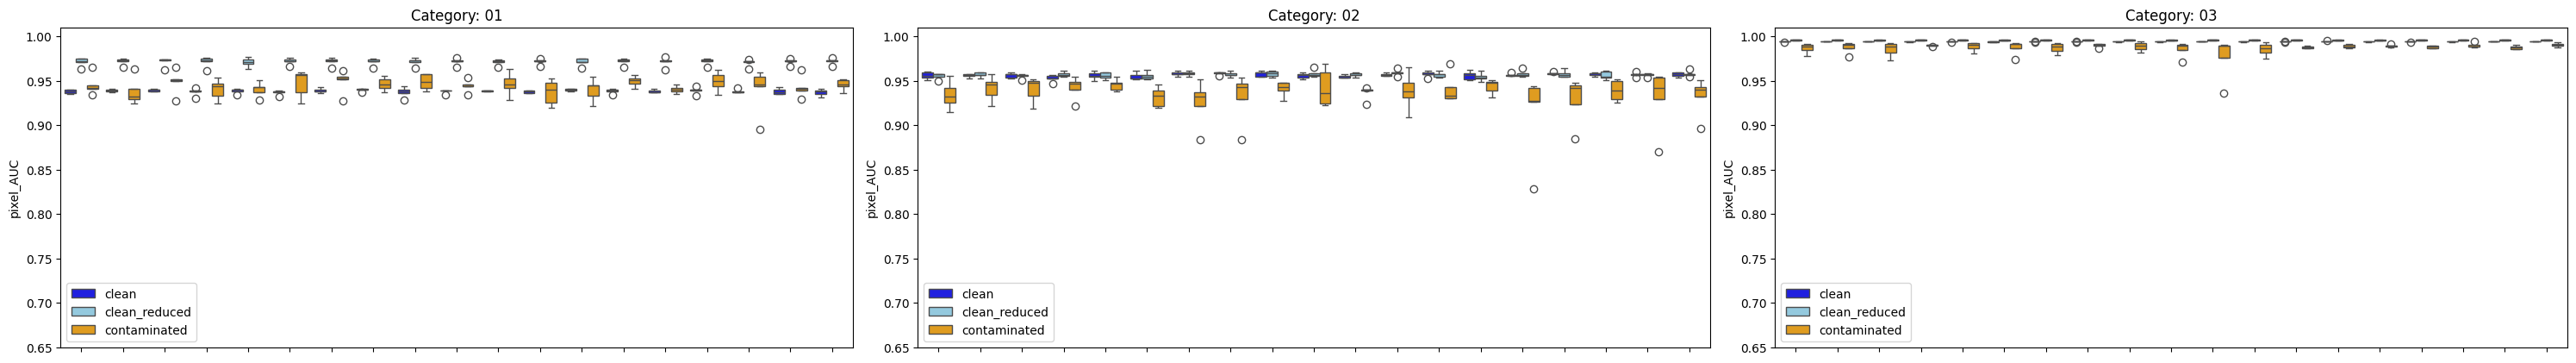

In [7]:
allres_epochs = allres[allres['epoch'] > 130]
categories =allres['category'].unique()
fig, axes = plt.subplots(5, 3, figsize=(30, 20), sharex=True)
axes = axes.flatten()
hue_order = ['clean', 'clean_reduced', 'contaminated']
palette = {
    'clean': 'blue',
    'clean_reduced': 'skyblue',
    'contaminated': 'orange'
}


for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    sns.boxplot(x="epoch", y="pixel_AUC", hue="setting", data=allres_cat, ax=ax,hue_order=hue_order,palette=palette)
    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    ax.set_ylim(0.65,1.01)
for ax in axes[len(categories):]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()

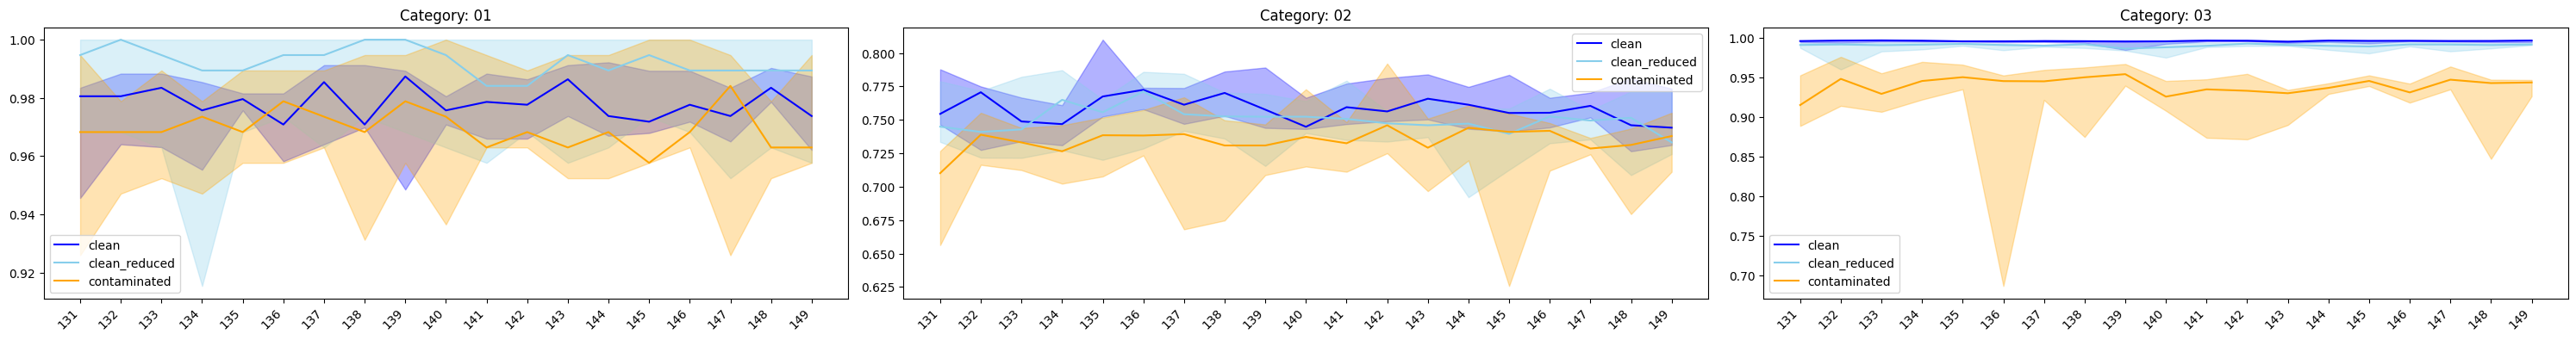

In [8]:
fig, axes = plt.subplots(5, 3, figsize=(30, 20))
axes = axes.flatten()


def calculate_stats(data):
    highest = data.groupby('epoch')['image_AUC'].max()
    lowest = data.groupby('epoch')['image_AUC'].min()
    median = data.groupby('epoch')['image_AUC'].median()
    return highest, lowest, median

for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    for setting in hue_order:
        data = allres_cat[allres_cat['setting'] == setting]
        highest, lowest, median = calculate_stats(data)
        epochs = highest.index
        
        ax.fill_between(epochs, lowest, highest, color=palette[setting], alpha=0.3)
        ax.plot(epochs, median, color=palette[setting], label=setting)

    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    # ax.set_ylim(0.65, 1.01)

    # Set x-ticks and labels for each subplot
    ax.set_xticks(list(epochs))
    ax.set_xticklabels(list(epochs), rotation=45, ha='right')  # Rotate x-tick labels for better readability

# Hide any unused subplots
for ax in axes[len(categories):]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for x-tick labels
plt.show()

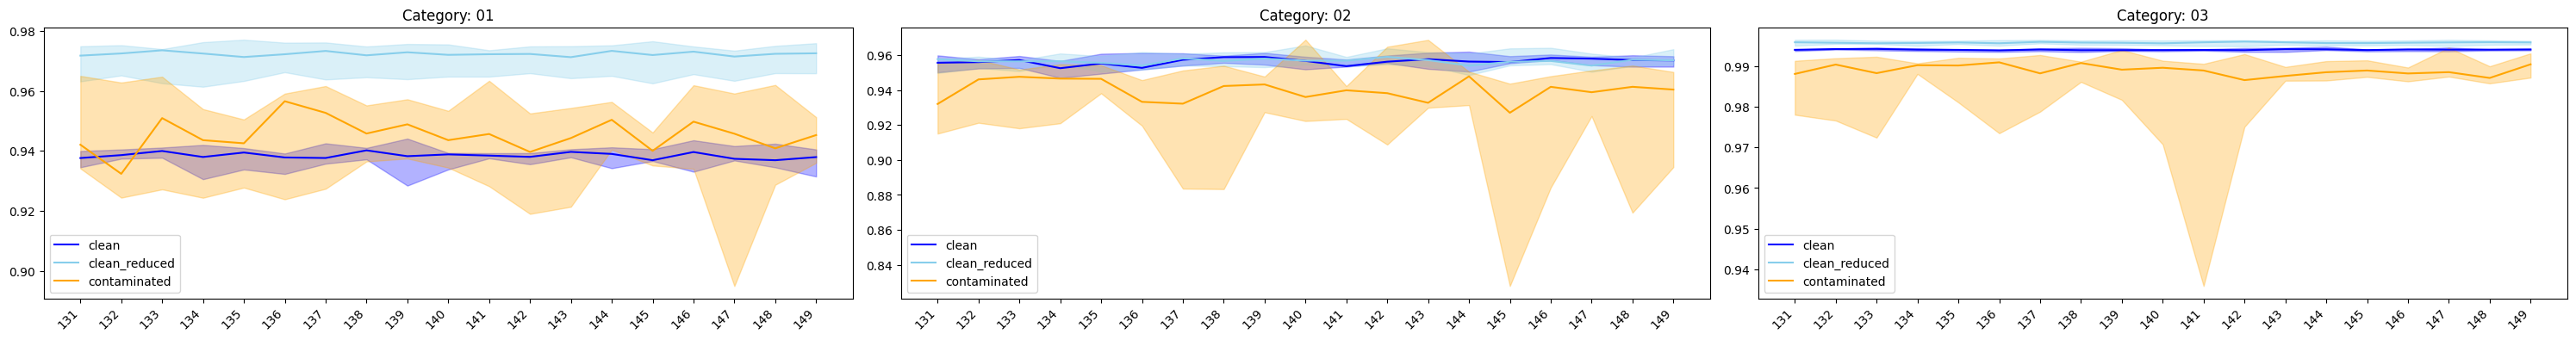

In [9]:
fig, axes = plt.subplots(5, 3, figsize=(30, 20))
axes = axes.flatten()


def calculate_stats(data):
    highest = data.groupby('epoch')['pixel_AUC'].max()
    lowest = data.groupby('epoch')['pixel_AUC'].min()
    median = data.groupby('epoch')['pixel_AUC'].median()
    return highest, lowest, median

for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    for setting in hue_order:
        data = allres_cat[allres_cat['setting'] == setting]
        highest, lowest, median = calculate_stats(data)
        epochs = highest.index
        
        ax.fill_between(epochs, lowest, highest, color=palette[setting], alpha=0.3)
        ax.plot(epochs, median, color=palette[setting], label=setting)

    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    # ax.set_ylim(0.65, 1.01)

    # Set x-ticks and labels for each subplot
    ax.set_xticks(list(epochs))
    ax.set_xticklabels(list(epochs), rotation=45, ha='right')  # Rotate x-tick labels for better readability

# Hide any unused subplots
for ax in axes[len(categories):]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for x-tick labels
plt.show()

# REmove redundatn results


In [10]:
#clean
dirs=[
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_1-01',
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_1-02',
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_2-01',
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_2-02',
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_3-01',
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_4-01',
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_5-01',
]


notlonglist=[]
for path in dirs:
    if len(read_training_scores(path+'/args_cleaned.log')['Loss'])<150:
        notlonglist.append(path)
notlonglist

[]

In [11]:
#10%
dirs=[

]


notlonglist=[]
for path in dirs:
    if len(read_training_scores(path+'/args.log')['Loss'])<150:
        notlonglist.append(path)
notlonglist

[]

In [12]:
import shutil
import os

# List of directories to remove
directories = [

]

# Function to remove directories
def remove_directories(dirs):
    for dir_path in dirs:
        if os.path.exists(dir_path):
            shutil.rmtree(dir_path)
            print(f"Removed directory and its contents: {dir_path}")
        else:
            print(f"Directory does not exist: {dir_path}")

# Remove the directories
remove_directories(directories)